## **News Summarizer**

This program takes news links as inputs and uses natural languege processing to output the title, the authors, both abrasive and extractive summaries, and does a sentimental analysis

Screenshots to view examples 

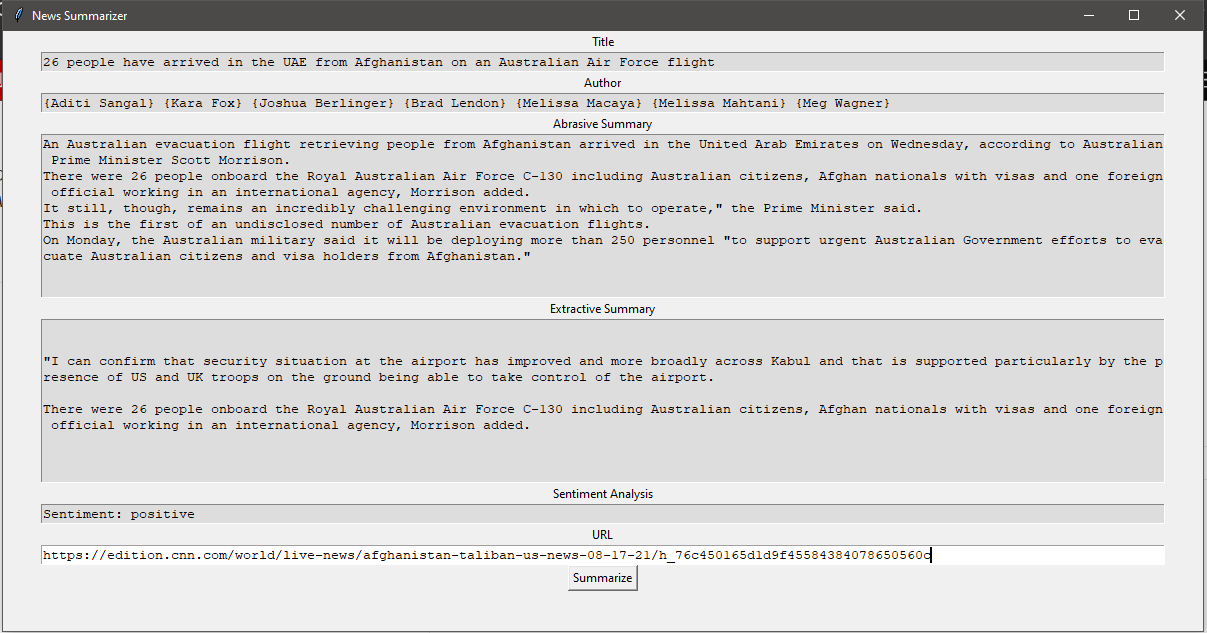

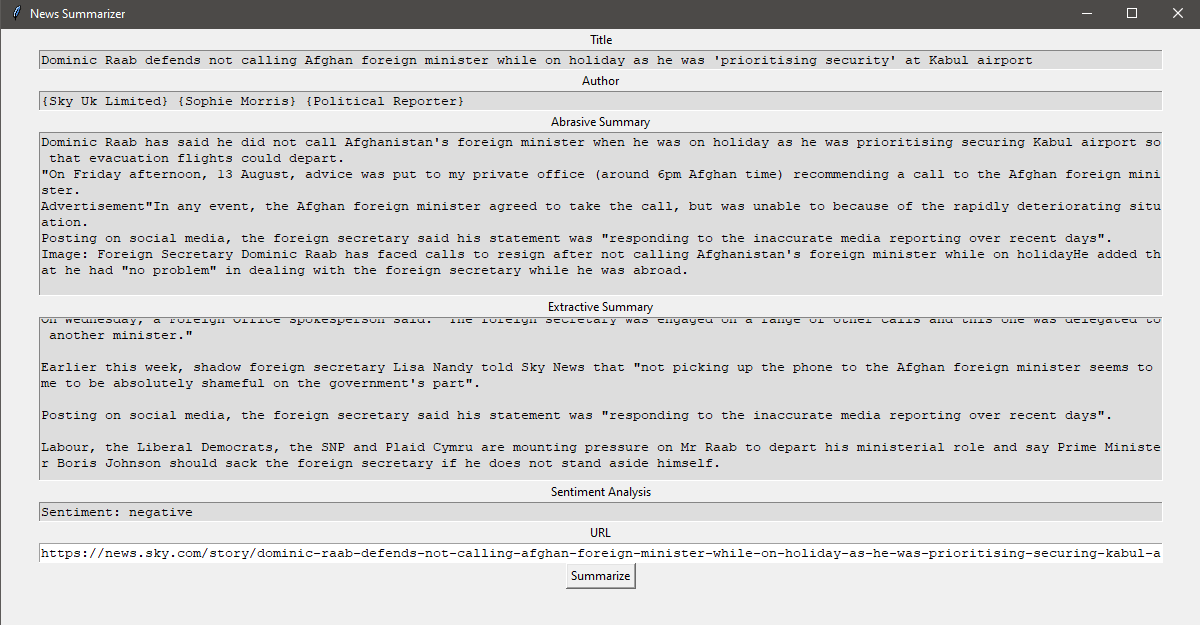

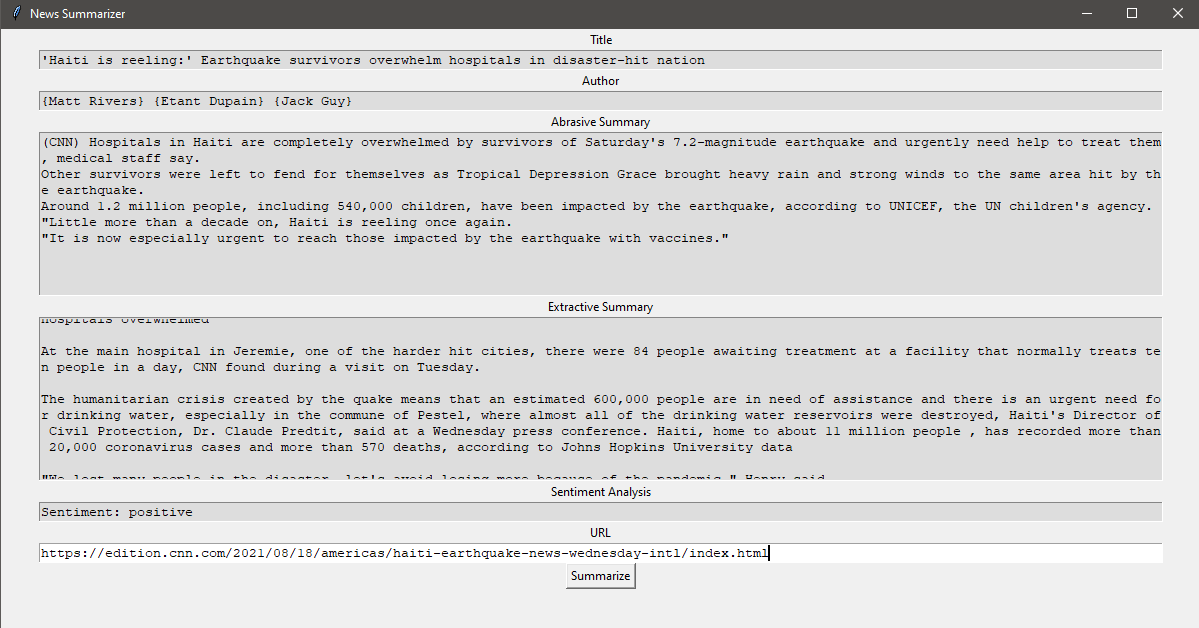

In [16]:
# importing libraries

import tkinter as tk
import nltk
from textblob import TextBlob
from newspaper import Article
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation 
from heapq import nlargest 
nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arnold\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
#the summarize function


def summarize(): 
    url = utext.get('1.0', "end").strip()
    article = Article(url)
    
    
    # using the newspaper library to handle getting the text, details and abrasive summary
    article.download()
    article.parse()
    article.nlp()
    
    # extractive natural languege processing 
    stopwords = list(STOP_WORDS)

    doc = nlp(article.text)
    
    tokens = [token.text for token in doc]

    word_frequencies = {}

    for word in doc:
        if word.text.lower() not in stopwords:
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1

    max_frequency = max(word_frequencies.values())

    for word in word_frequencies.keys():
        word_frequencies[word] = word_frequencies[word]/max_frequency

    sentence_tokens = [sent for sent in doc.sents]

    sentence_scores = {}

    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent] += word_frequencies[word.text.lower()]

    select_length = int(len(sentence_tokens)*0.3)

    ex_summary_text = nlargest(select_length, sentence_scores, key = sentence_scores.get)

    final_summary = [word.text for word in ex_summary_text]

    ex_summary_text = ' '.join(final_summary)
    
    title.config(state='normal')
    author.config(state='normal')
    ab_summary.config(state='normal')
    ex_summary.config(state='normal')
    sentiment.config(state='normal')
    
    title.delete('1.0', 'end')
    title.insert('1.0', article.title)
    
    author.delete('1.0', 'end')
    author.insert('1.0', article.authors)
    
    ab_summary.delete('1.0', 'end')
    ab_summary.insert('1.0', article.summary)
    
    ex_summary.delete('1.0', 'end')
    ex_summary.insert('1.0', ex_summary_text)
    
    analysis = TextBlob(article.text)
    sentiment.delete('1.0', 'end')
    sentiment.insert('1.0', f'Sentiment: {"positive" if analysis.polarity > 0 else "negative" if analysis.polarity < 0 else "neutral"}')
    
    title.config(state='disabled')
    author.config(state='disabled')
    ab_summary.config(state='disabled')
    ex_summary.config(state='disabled')
    sentiment.config(state='disabled')

In [18]:
# building the application

punctuation = punctuation + '\n'

root = tk.Tk()
root.title("News Summarizer")
root.geometry('1200x600')

tlabel = tk.Label(root, text="Title")
tlabel.pack()

title = tk.Text(root, height=1, width=140)
title.config(state='disabled', bg='#dddddd')
title.pack()

alabel = tk.Label(root, text="Author")
alabel.pack()

author = tk.Text(root, height=1, width=140)
author.config(state='disabled', bg='#dddddd')
author.pack()

slabel = tk.Label(root, text="Abrasive Summary")
slabel.pack()

ab_summary = tk.Text(root, height=10, width=140)
ab_summary.config(state='disabled', bg='#dddddd')
ab_summary.pack()

sxlabel = tk.Label(root, text="Extractive Summary")
sxlabel.pack()

ex_summary = tk.Text(root, height=10, width=140)
ex_summary.config(state='disabled', bg='#dddddd')
ex_summary.pack()

selabel = tk.Label(root, text="Sentiment Analysis")
selabel.pack()

sentiment = tk.Text(root, height=1, width=140)
sentiment.config(state='disabled', bg='#dddddd')
sentiment.pack()

ulabel = tk.Label(root, text="URL")
ulabel.pack()

utext = tk.Text(root, height=1, width=140)
utext.pack()

btn = tk.Button(root, text="Summarize", command=summarize)
btn.pack()

root.mainloop()